In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

PART - 1 : Model Building and  hosting local API
1. Data Preparation
2. Machine Learning Modelling
3. Model Evaluation
4. Export Trained Model
5. LOCAL REST API with Flask web-server 
6. Create a website for predicing marriage age calling REST API

PART - 2 : Deploying Public API to AWS EC2 server and launch website service 
1. Spin up an EC2 server
2. Configure EC2 with security group and private key
3. Install libraries and dependencies on the EC2 server
4. Move trained model and app.py flask files to EC2 (winscp)
5. Configure flaskapp.wsgi file and Apache vhost file
6. Restart apache webserver and Check API status
7. Launch a website with domain name and host webpage.

In [2]:
data=pd.read_csv('age_of_marriage_data .csv')
print(data.shape)
data.head()

(2567, 10)


,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


> ### EDA

In [3]:
data.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [4]:
#check null values
data.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

<AxesSubplot:>

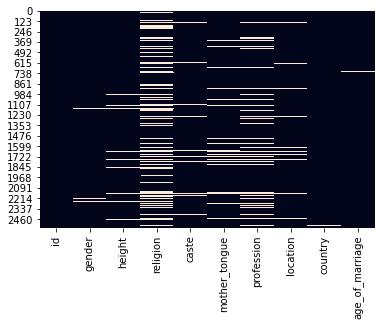

In [5]:
sns.heatmap(data.isnull(),cbar=False)

In [6]:
null_values=data.isnull().sum()/len(data)
for i in range(len(null_values.index)):
    print("Column",null_values.index[i],"has ",null_values[i]*100,"% null values\n")

Column id has  0.0 % null values

Column gender has  1.1297234125438256 % null values

Column height has  4.596805609661083 % null values

Column religion has  24.737047136735487 % null values

Column caste has  5.531749123490456 % null values

Column mother_tongue has  6.388780677834048 % null values

Column profession has  12.855473315153876 % null values

Column location has  6.038176860148033 % null values

Column country has  0.6232956758862486 % null values

Column age_of_marriage has  0.7401636151149201 % null values



In [7]:
data.describe()

,id,age_of_marriage
count,2567.000000,2548.000000
mean,1284.000000,29.648352
std,741.173394,2.802414
min,1.000000,20.000000
25%,642.500000,28.000000
50%,1284.000000,30.000000
75%,1925.500000,32.000000
max,2567.000000,36.000000


> ## preprocessing

In [8]:
## fill missing values
data.fillna(data.mean(),inplace=True)
data.dropna(inplace=True)
data.isnull().sum()

id                 0
gender             0
height             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
dtype: int64

In [9]:
data.columns

Index(['id', 'gender', 'height', 'religion', 'caste', 'mother_tongue',
       'profession', 'location', 'country', 'age_of_marriage'],
      dtype='object')

In [10]:
# feature selection

df=data.loc[:,['gender','height','religion','caste','mother_tongue',
       'profession','location','country','age_of_marriage']]
df.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


In [11]:
#split x y
x=df.loc[:,['gender','height','religion','caste','mother_tongue',
    'country']]
y=df.age_of_marriage

In [12]:
x.head()

,gender,height,religion,caste,mother_tongue,country
1,male,"5'7""",Jain,Shwetamber,Gujarati,USA
2,male,"5'7""",Hindu,Brahmin,Hindi,India
3,female,"5'0""",Hindu,Thakur,Hindi,India
4,male,"5'5""",Christian,Born Again,Malayalam,India
5,male,"5'5""",Hindu,Valmiki,Hindi,India


convert categorical data ...

convert height into centimeters

In [13]:
#label encoding

from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

x.loc[:,['gender','religion','caste','mother_tongue','country']]=\
x.loc[:,['gender','religion','caste','mother_tongue','country']].apply(enc.fit_transform)

In [14]:
map={l: i for i,l in enumerate(enc.classes_)}
map

{' Australia': 0,
 ' Bahrain': 1,
 ' Bangladesh': 2,
 ' Canada': 3,
 ' Germany': 4,
 ' India': 5,
 ' Ireland': 6,
 ' Kuwait': 7,
 ' Malaysia': 8,
 ' Myanmar': 9,
 ' Netherlands': 10,
 ' New Zealand': 11,
 ' Norway': 12,
 ' Oman': 13,
 ' Pakistan': 14,
 ' Philippines': 15,
 ' Qatar': 16,
 ' Singapore': 17,
 ' South Africa': 18,
 ' USA': 19,
 ' United Arab Emirates': 20,
 ' United Kingdom': 21}

In [15]:
h_feet=int(x.loc[1,'height'].split("'")[0])*30.48
h_inch=int(x.loc[1,'height'].split("'")[1].split("\"")[0])*2.54

print("feet :",h_feet)
print("inches:",h_inch)

feet : 152.4
inches: 17.78


In [16]:
#convert height (feet inches) into centimeters

def h_cm(h):
    return int(h.split("'")[0])*30.48+int(h.split("'")[1].split("\"")[0])*2.54 

x['height_cm']=x.height.apply(h_cm)
x=x.drop('height',axis=1)
x.head()

,gender,religion,caste,mother_tongue,country,height_cm
1,1,2,34,6,19,170.18
2,1,1,14,8,5,170.18
3,0,1,36,8,5,152.40
4,1,0,13,13,5,165.10
5,1,1,38,8,5,165.10


> ### Model Building

In [17]:
#split into train,test data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrain.shape,ytest.shape

((1545, 6), (387,))

In [18]:
#RandomForest model fitting
model=RandomForestRegressor(max_depth=10,n_estimators=80,random_state=0)
model.fit(xtrain,ytrain)
rf_pred=model.predict(xtest)


> ## Model evaluation

In [19]:
print('R2Score:',r2_score(ytest,rf_pred))
print()
print('Mean_absolute_error:',mean_absolute_error(ytest,rf_pred))
print()
print('Mean_Squared_error:',mean_squared_error(ytest,rf_pred))

R2Score: 0.6984499829311536

Mean_absolute_error: 1.038091473137464

Mean_Squared_error: 1.4918983183939083


> ## Export Trained model 
- using joblib library

In [49]:
import joblib
# file='marriage_age_predict_model.ml'
        
joblib.dump(model,'marriage_age_predict_model.ml')

    

['marriage_age_predict_model.ml']

In [50]:
#load model 

model=joblib.load('marriage_age_predict_model.ml')

In [51]:
age_predict=model.predict([[1,0,5,4,3,180]])  #value gender,religion,caste,mother_tongue,country,height_cms
age_predict

array([29.3489424])